# Our goal is to generate 2 data and classify them using SVM and k-NN.

## Loading libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
from matplotlib.colors import ListedColormap


## Generate the data and Visualization

100 samples from 2 different classes

Text(0.5, 1.0, '100 samples from 2 different classes')

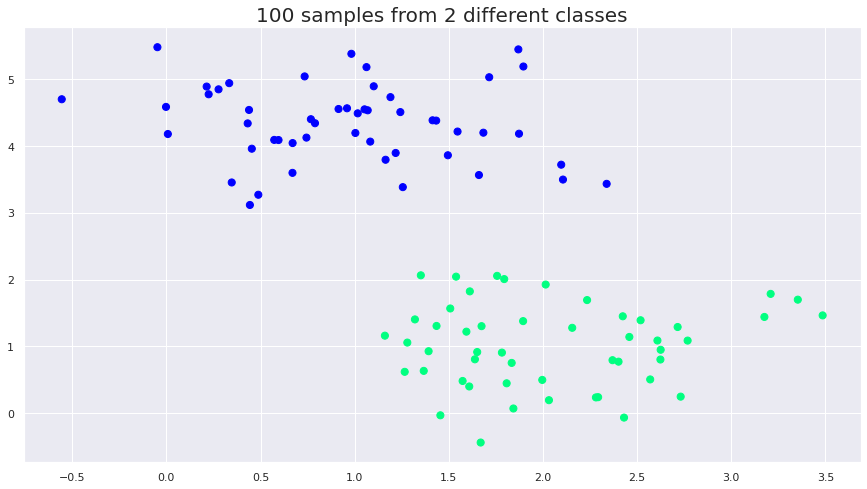

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 0.60)
plt.figure(figsize=(15, 8))
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'winter');
plt.title("100 samples from 2 different classes", size=20)

In [ ]:
#data = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
#data

## SVM

In [ ]:
from sklearn import svm

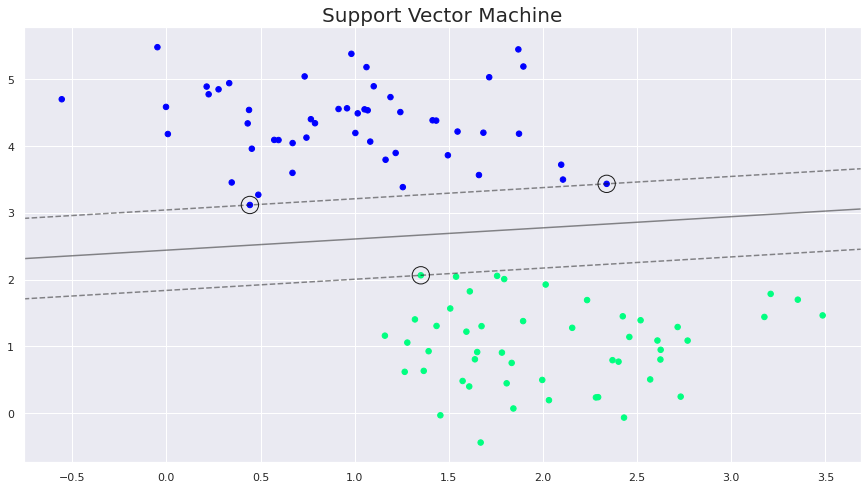

In [ ]:
# we create 100 separable points
X, y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 0.60)
# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)
plt.figure(figsize=(15, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='winter')

# plot the decision function

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
""
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300,
           linewidth=1, facecolors='none', edgecolors='k')
plt.title("Support Vector Machine", size=20)
plt.show()

In [ ]:
print(clf.predict([[ 2, 3]]))

[0]


## k-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
train,target=make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 0.60)
#Training data
X_train = train
Y_train = target
#Get x, y axis value range
xmin,xmax = train[:,0].min()-0.5,train[:,0].max()+0.5
ymin,ymax = train[:,1].min()-0.5,train[:,1].max()+0.5

#Generate two lists of x and y for gridding
x = np.arange(xmin,xmax,0.05)
y = np.arange(ymin,ymax,0.05)
xx,yy=np.meshgrid(x,y)

#Test Data
x_test=np.c_[xx.ravel(),yy.ravel()]

### n_neighbors=1

In [ ]:
knnclf = KNeighborsClassifier(n_neighbors=1)
knnclf.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
y_pre_knn = knnclf.predict(x_test)

Text(0.5, 1.0, 'for n_neighbors=1')

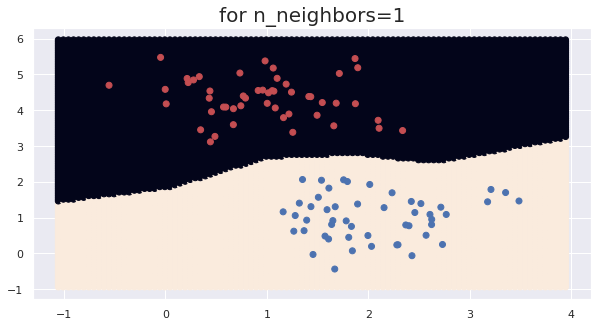

In [ ]:
plt.figure(figsize=(10, 5))
cmap = ListedColormap(['r','g','b'])
plt.scatter(x_test[:,0],x_test[:,1],c=y_pre_knn)
plt.scatter(train[:,0],train[:,1],c=target,cmap=cmap)
plt.title("for n_neighbors=1", size=20)

In [ ]:
print(knnclf.predict([[ 2, 3]]))

[0]


### n_neighbors=3

In [ ]:
knnclf = KNeighborsClassifier(n_neighbors=3)
knnclf.fit(X_train,Y_train)
y_pre_knn = knnclf.predict(x_test)

Text(0.5, 1.0, 'for n_neighbors=3')

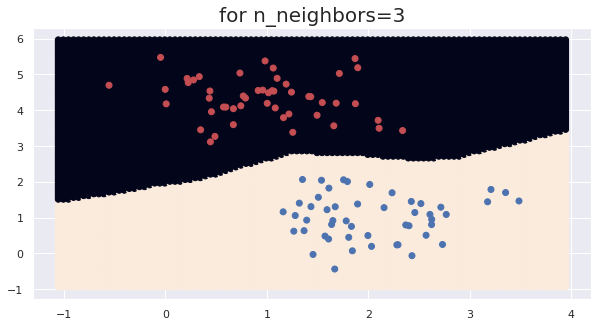

In [ ]:
plt.figure(figsize=(10, 5))
cmap = ListedColormap(['r','g','b'])
plt.scatter(x_test[:,0],x_test[:,1],c=y_pre_knn)
plt.scatter(train[:,0],train[:,1],c=target,cmap=cmap)
plt.title("for n_neighbors=3", size=20)

In [ ]:
print(knnclf.predict([[ 2, 3]]))

[0]


### n_neighbors=15

In [ ]:
knnclf = KNeighborsClassifier(n_neighbors=15)
knnclf.fit(X_train,Y_train)
y_pre_knn = knnclf.predict(x_test)

Text(0.5, 1.0, 'for n_neighbors=15')

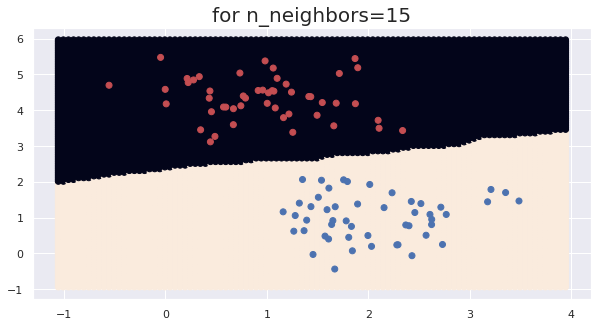

In [ ]:
plt.figure(figsize=(10, 5))
cmap = ListedColormap(['r','g','b'])
plt.scatter(x_test[:,0],x_test[:,1],c=y_pre_knn)
plt.scatter(train[:,0],train[:,1],c=target,cmap=cmap)
plt.title("for n_neighbors=15", size=20)

### n_neighbors=75

In [ ]:
knnclf = KNeighborsClassifier(n_neighbors=75)
knnclf.fit(X_train,Y_train)
y_pre_knn = knnclf.predict(x_test)

Text(0.5, 1.0, 'for n_neighbors=75')

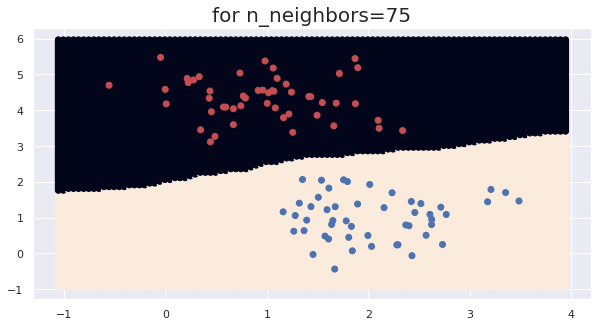

In [ ]:
plt.figure(figsize=(10, 5))
cmap = ListedColormap(['r','g','b'])
plt.scatter(x_test[:,0],x_test[:,1],c=y_pre_knn)
plt.scatter(train[:,0],train[:,1],c=target,cmap=cmap)
plt.title("for n_neighbors=75", size=20)